<a href="https://colab.research.google.com/github/maxbentley/datasciencefund/blob/main/Unit7/Max_Bentley_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

**Answer1**:

If you think that there are patterns in your data that cannot be represented by a linear relationship (like a definite peak not at the very end of the data) then a polynomial regression would be beneficial.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

**Answer2**:

If the trend in your model can be accurately represented using a linear relationship (or a generalized linear relationship), then you should use a simpler model like the aforementioned instead of a more complex polynomial one to prevent overfitting.

**Task3**:

What's the point of using b splines?

**Answer3**:

B-splines give different fits for different parts of the data, instead of looking at the data as a whole like polynomial regression. This allows for more localized relationships between the data, which allows for less overfitting than pure polynomial regression as overzealous polynomial regressions look at broader patterns in the data that may be too specific and un-necessary. Since splines are localized, the individual knots/fits don't need to be very complicated.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

**Answer4**:

Gaussian Processes are b-splines where each knot is (instead of a n-degree polynomial) a collection of weighted relationships between data points, allowing for the relationships between nodes to become, by "definition", as localized as possible, making them the platonic ideal b-spline.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one. Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


## **Answer5**

I decided to test both a polynomial model and a b-spline to get a little practice with both models. I've divided the answer into sections for readability.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-3ot2b94g
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-3ot2b94g
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [ ]:
howell = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv")

In [ ]:
# convert weight/height df columns to array of values
weight = howell['weight'].values
height = howell['height'].values

### B-spline

In [ ]:
num_knots = 3 # doesn't look like there's much curviness here, using less knots for a simpler model
knots = np.linspace(53, 180, num_knots+2)[1:-1] # evenly spaced array, not including upper/lower bounds
hw_spline = bmb.Model("weight ~ bs(height, degree=2, knots=knots)", data=howell, family='gaussian') # Gaussian family = normal dist.
idata_spline = hw_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


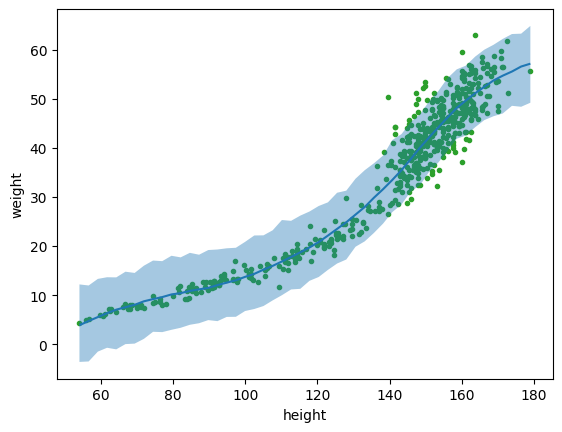

In [ ]:
# plot
bmb.interpret.plot_predictions(hw_spline, idata_spline, "height", pps=True)
plt.plot(height, weight, 'C2.', zorder=-3)

### Polynomial

In [ ]:
hw_poly = bmb.Model("weight ~ poly(height, degree=5)", data=howell, family='gaussian') # gaussian family = normal dist.
idata_poly = hw_poly.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


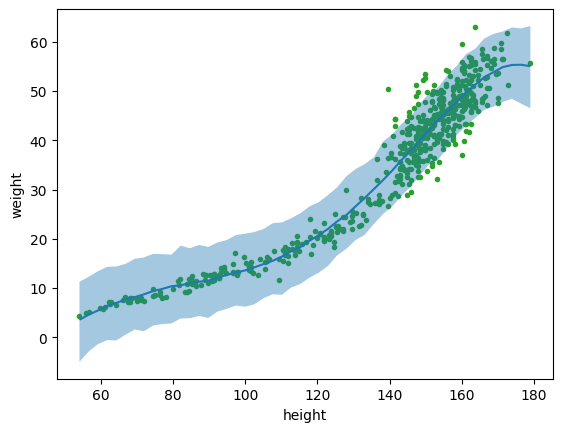

In [ ]:
# plot
bmb.interpret.plot_predictions(hw_poly, idata_poly, "height", pps=True)
plt.plot(height, weight, 'C2.', zorder=-3)

### Conclusion

The b-spline looks like a better model than the polynomial model, which is great since the b-spline is of degree 2, whereas the polynomial is of degree 5, meaning that the model that is at less risk of overfitting (the b-spline) works better than the more complex model.

## Task6 + beyond

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Answer6**:

Where you put your changepoints/knots changes basically everything about the outcome of your model.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

**Answer7**:

My favorite graph from the article is the fourth-to-last graph. It shows both datasets plotted--the Mauna Loa and ice core data--with the data points being separated by whether or not they were used in fitting the model, as well as the samples of the posterior. I thought this was pretty cool because it 1. shows the ice core data within the context of the Mauna Loa data, and because it 2. shows that all of the test data can be fit inside of the range of posterior samples.